In [1]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

Look at the data we created in the beginning. Analyze it to figure out how big a cycle is. Use your programming skills to derive the cycle time rather than looking at the code used to create the series.

In [2]:
#create dataframe
learning_progress = pd.DataFrame()

# Add a range of 100 dates starting Jan 1, 2017.
learning_progress['date'] = pd.date_range(start='2017-01-01', periods=100)

# Add linearly increasing knowledge and oscillating confidence.
learning_progress['knowledge'] = np.arange(0, 100)
learning_progress['confidence'] = 10 * np.cos(np.arange(0, 100) * np.pi / 7) + np.arange(0, 100)

In [8]:
from sklearn import linear_model
lm = linear_model.LinearRegression()

# convert to numeric for sklearn
X = pd.DataFrame(pd.to_numeric(learning_progress['date']))
Y = learning_progress['confidence']


In [10]:
X = pd.DataFrame()
X['date'] = pd.to_numeric(learning_progress.date) / (1000000000 * 24 * 60 * 60)

# Note that we're subtracting 17167 from date.
# This is to normalize it so that it starts at zero.
# This aligns the peak of the curve with the start of the cosine function.

X['cos_date'] = np.cos((X.date - 17167) * np.pi / 3.5)
Y = learning_progress['confidence']
lm.fit(X, Y)
lm.score(X, Y)

0.9432077395162713

There are a few different ways we can explore the seasonality of a time series data. First, I can look at the rolling average, which essentially removes the trend and allows you to look at the seasonality. Second, I can look at first order differences between the data points. Finally, I can also look into autocorrelation.

Text(0.5, 0, 'date')

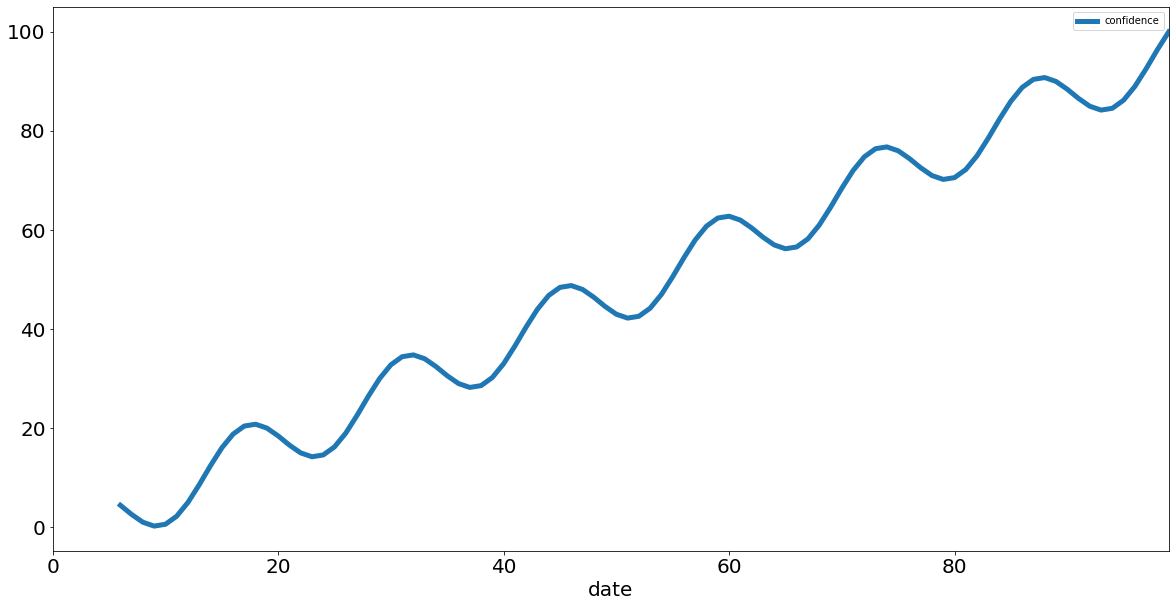

In [17]:
#look at rolling average
confidence = learning_progress[['confidence']]
confidence.rolling(7).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('date', fontsize=20)

The above graphic illustrates that there is certainly some seasonablity to this time series.  

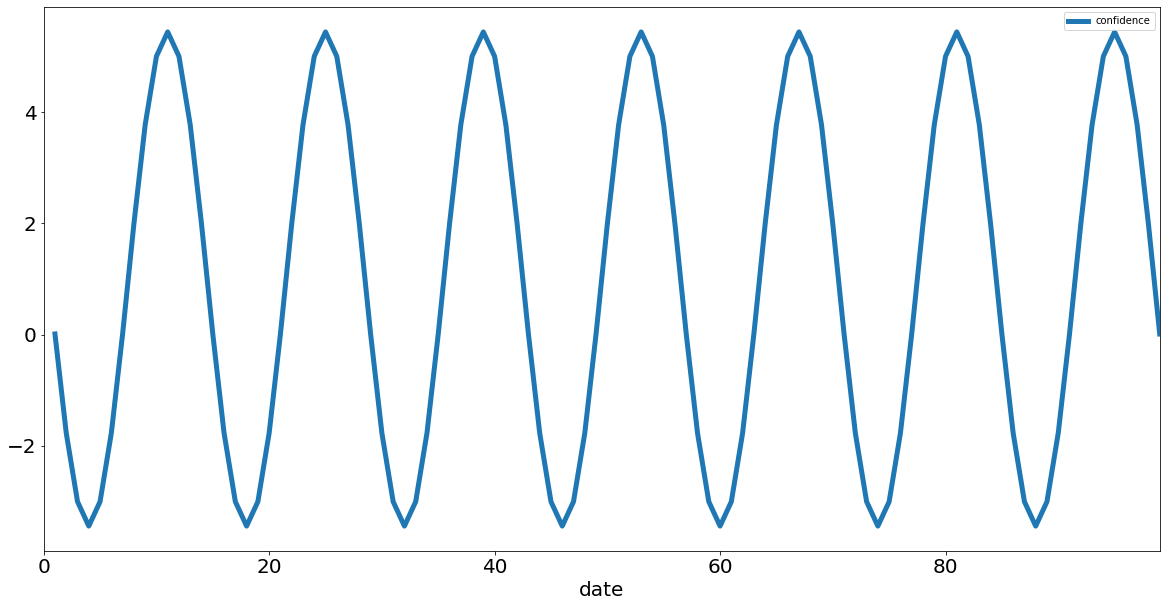

In [18]:
#get first order differences
confidence.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('date', fontsize=20);

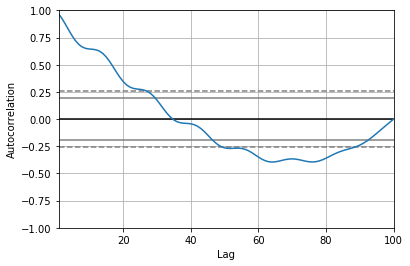

In [19]:
#get autocorrelation plot
pd.plotting.autocorrelation_plot(confidence);

The autocorrelation graphic illustrates the lag (x-axis) and then how correlated the time series is with itself at that particular lag (y-axis). When the time series repeats itself, you see a spike in the above graphic. So, there are spikes (i.e., the time series repeating itself) at day 10, 22, 38, and so on. The spikes are not huge but the graphic does indicate that there is some seasonality with the data (which we know to be true based on the dataframe we created). There are also some window statistics we can compute, like rolling averages and sums. I used a 7-day window since the data is weekly. The tables below also demonstrate that there is seasonality to this time series and allow one to see how long the duration of each oscillation is.

In [26]:
confidence2 = confidence.rolling(7).sum()
confidence2.head(20)

,confidence
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,31.000000
7,18.000000
8,6.980623
9,1.510827


In [27]:
confidence3 = confidence.rolling(7).mean()
confidence3.head(20)

,confidence
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,4.428571
7,2.571429
8,0.997232
9,0.215832
